In [1]:
#Librairies
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import statistics
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import math
import unidecode
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import seaborn as sns
import scipy.stats
import warnings
from scipy.stats import sem

In [2]:
primo=pd.read_csv("/kaggle/input/primo-dem/primo_demandeur.csv", sep=",",encoding="latin")
primo.head()

/tmp/ipykernel_42/855801948.py:1: DtypeWarning: Columns (8,30,31,69,78,100,109,110,111,121,126,128,130,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,157,159,160,161,165,167,168,169,173,174,175,176,180,181,182,183,187,188,189,190,194,195,196,197,201,202,203,204,208,209,210,211,215,216,217,218,222,223,224,225,229,230,231,232,236,237,238,239,243,244,245,246,250,251,252,253,255,256,258,259,261,262,264,265,267,268,270,271,273,274,276,277,279,280,282,283,285,286,288,289,291,292,294,295,297,298,300,301,303,304,306,307,309,310,312,313,315,316,318,319,321,322,324,325,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,412,414,415,416,417,426,432,435,438,441,444,447,453,456,459,470,477,478,479,480,482,526,527,528,529,530,546,550,554,558,562,566,570,574,578,582,586,594,595,599,600,601,603,604,605,606,608,609,610,614,615,619,620,624,625,629,630,631,633,634,635,636,638,639,640,644,645,646,648,659,663,667,671,673,676,800,815,828,831) have

,STRATE,hh1,hh2,m1,NOM_DE_L_INDIVIDU,m4,NB_UPI,ADRESSE_ENQ,TELEPHON_ENQ,QUALQUI,...,emploi_parent,cat_parent,act_parent,duree_emp,duree_noemp,grp_age,grp_age_p,duree_chomage,salaire,degree
0,AUTONOME D'ABIDJAN,1,3,4,KOUAKOU CEDRIC,23,0,ABOBO PK 18,79846979,Lui-mÃªme,...,Handicap,NaN,Service,NaN,NaN,15 Ã 24 ans,20 Ã 24 ans,0,0,BaccalaurÃ©at et plus
1,AUTONOME D'ABIDJAN,1,3,5,KOUAKOU VICTOIRE,23,0,ABOBO PK 18,48603466,Autre personne,...,Handicap,NaN,Service,NaN,NaN,15 Ã 24 ans,20 Ã 24 ans,0,0,BaccalaurÃ©at et plus
2,AUTONOME D'ABIDJAN,1,4,1,KABORE SOULEMANE,34,0,ABOBO PK18 AGRIPAC,79792636,Lui-mÃªme,...,NaN,NaN,NaN,0.0,NaN,25 Ã 35 ans,30 Ã 34 ans,0,0,Aucun
3,AUTONOME D'ABIDJAN,1,6,1,KOUADIO SIMPLICE,32,0,ABOBO PK18 AGRIPAC,6103026,Lui-mÃªme,...,Handicap,NaN,Commerce,0.0,NaN,25 Ã 35 ans,30 Ã 34 ans,0,]150 000 - 300 000],DEF/BEPC/CAP/BT
4,AUTONOME D'ABIDJAN,1,7,8,OUATTARA TCHOMOGO,18,0,ABOBO PK 18 AGRIPAC,99999999,Autre personne,...,Handicap,NaN,Commerce,NaN,NaN,15 Ã 24 ans,15 Ã 19 ans,0,0,DEF/BEPC/CAP/BT


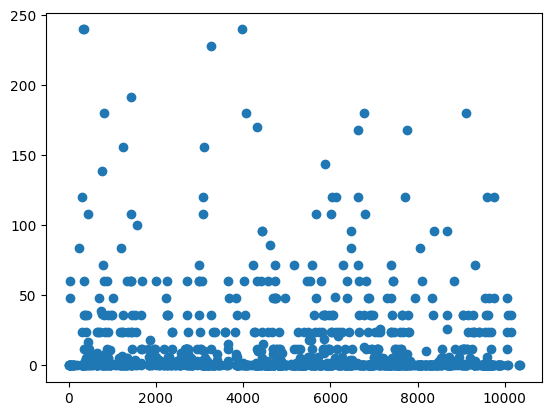

In [5]:
plt.scatter(primo[(primo["duree_emp"]!="0") & (primo["salaire"]!="0")].index,primo[(primo["duree_emp"]!="0") & (primo["salaire"]!="0")]['duree_emp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7aa5d9e177f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7aa5d9e170d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7aa5d9e17b80>],
 'medians': [<matplotlib.lines.Line2D at 0x7aa5d9e168f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7aa5d9e44280>],
 'means': []}

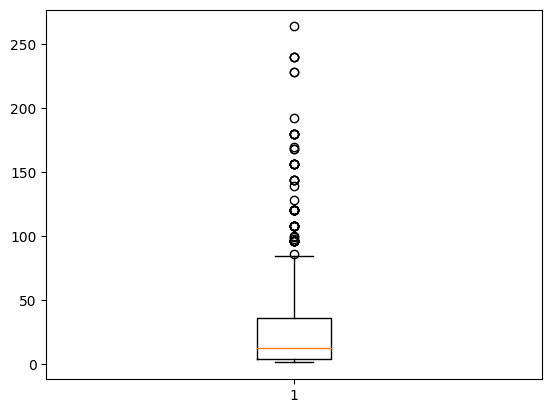

In [16]:
plt.boxplot(primo[(primo["duree_emp"]>0)]["duree_emp"])

In [27]:
print('std :',primo[(primo["duree_emp"]>0)]["duree_emp"].mean()+3*primo[(primo["duree_emp"]>0)]["duree_emp"].std())
print('out_q1 :', np.nanpercentile(primo[(primo["duree_emp"]>0)]["duree_emp"],25)-1.5*(np.nanpercentile(primo[(primo["duree_emp"]>0)]["duree_emp"],75)-np.nanpercentile(primo[(primo["duree_emp"]>0)]["duree_emp"],25)))
print('out_q3 :', np.nanpercentile(primo[(primo["duree_emp"]>0)]["duree_emp"],75)+1.5*(np.nanpercentile(primo[(primo["duree_emp"]>0)]["duree_emp"],75)-np.nanpercentile(primo[(primo["duree_emp"]>0)]["duree_emp"],25)))

std : 130.9813456851412
out_q1 : -44.0
out_q3 : 84.0


In [20]:
statistics.mode(primo[(primo["duree_emp"]>0)]["duree_emp"])

12.0

In [26]:
primo[(primo["duree_emp"]>0)]["duree_emp"].median()

12.0

In [29]:
#replace outliers by mode
for i in range(0,primo.shape[0]):
    if primo.loc[i,"duree_emp"]>84:
        primo.loc[i,"duree_emp"]=12

In [39]:
#Catégoriser durée_emp
primo["duree_chomage"]="0"
for i in range(primo.shape[0]):
    if (primo.loc[i,"duree_emp"]>0) & (primo.loc[i,"duree_emp"]<6):
        primo.loc[i,"duree_chomage"]="moins de 6 mois"
    if (primo.loc[i,"duree_emp"]>=6) & (primo.loc[i,"duree_emp"]<=12):
        primo.loc[i,"duree_chomage"]="6 mois à 1 an"
    if (primo.loc[i,"duree_emp"]>12) & (primo.loc[i,"duree_emp"]<=24):
        primo.loc[i,"duree_chomage"]="Plus d'un an à 2 ans"
    if primo.loc[i,"duree_emp"]>24:
        primo.loc[i,"duree_chomage"]="Plus de 2 ans"
primo["duree_chomage"].value_counts()/primo[primo["duree_chomage"]!="0"]["duree_chomage"].value_counts().sum()

duree_chomage
0                       7.282643
moins de 6 mois         0.318471
6 mois à 1 an           0.312898
Plus de 2 ans           0.222930
Plus d'un an à 2 ans    0.145701
Name: count, dtype: float64

In [46]:
tab=pd.DataFrame()
for i in ["sexe","grp_age", "sit_matrimoniale","milieu", "nationalite", "niveau_instruction", "type_enseignement", "formation_prof", "degree", "handicap", "act_parent", 
          "emploi_parent", "cat_parent", "AP4", "AP8A41", "AP8A6", "AP8B", "AP9B", "typemp_ap"]:
    tab1=pd.crosstab(primo[primo["duree_chomage"]!="0"][i],primo[primo["duree_chomage"]!="0"]["duree_chomage"],normalize='columns')\
    .round(4)*100
    tab=pd.concat([tab,tab1])
tab=pd.concat([tab,pd.crosstab(primo[(primo["duree_chomage"]!="0") & (primo["salaire"]!="0")]["salaire"],primo[(primo["duree_chomage"]!="0") & (primo["salaire"]!="0")]["duree_chomage"],normalize='columns')\
    .round(4)*100])
tab.to_excel("tab.xlsx")